### Ejercicio 1 (Segunda parte)

### Si tuviese que eliminar dos variables cuales serían y porqué. Use SelectKBest.

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pylab as plt 
import warnings

warnings.filterwarnings('ignore')

In [2]:
covid = pd.read_csv("covid_clean.csv",sep=",",header=0, index_col = 0)
covid.head()

,SEXO,OBESIDAD,DIABETES,EPOC,ASMA,CARDIOVASCULAR,RENAL.CRONICA,INMUNOSUPRESION,HIPERTENSION,TABAQUISMO,TIPO.PACIENTE,EDAD
1,0,0,0,0,0,0,0,0,0,0,0,51
2,0,0,0,0,0,0,0,0,0,1,0,37
3,1,0,0,0,0,0,0,0,0,0,0,18
4,1,0,0,0,0,0,0,0,0,0,0,40
5,0,0,1,0,0,0,1,0,1,0,1,78


In [3]:
columnas=["SEXO","OBESIDAD","DIABETES","EPOC","ASMA","CARDIOVASCULAR","RENAL.CRONICA","INMUNOSUPRESION","HIPERTENSION","TABAQUISMO","EDAD"]

In [4]:
y = covid[['TIPO.PACIENTE']]
X_0 = covid[columnas]

In [5]:
fselect = SelectKBest(f_classif, k='all')
scores_fit = fselect.fit(X_0, y)
features_score = scores_fit.scores_.round(3)

,Feature,Score
0,SEXO,3720.162
1,OBESIDAD,1730.123
2,DIABETES,25618.236
3,EPOC,3167.341
4,ASMA,105.080
5,CARDIOVASCULAR,2558.727
6,RENAL.CRONICA,5360.234
7,INMUNOSUPRESION,1493.448
8,HIPERTENSION,21614.331
9,TABAQUISMO,50.930


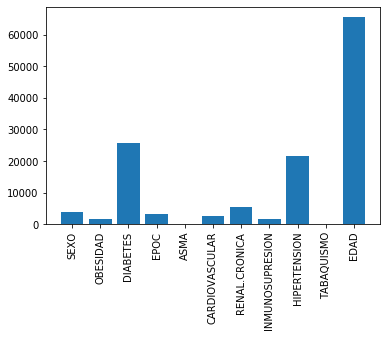

In [10]:
#los visualizamos en una tabla 
features= list(X_0.columns.values)
selected_features = fselect.get_support([scores_fit])
feat_list = [ ]
for i in selected_features:
    feat_list.append({'Feature':features[i], 'Score': features_score[i]  })
features_select = pd.DataFrame(feat_list)
display(features_select)

plt.bar(range(len(columnas)), features_score)
plt.xticks(range(len(columnas)), columnas, rotation='vertical')
plt.show()

Las dos variables con score menos significativo son ASMA y TABAQUISMO, por esta razón si tuvieramos que eliminar 2 variables, estas serían las variables que se podrían eliminar. 

#### Conclusión:

En la selección de variables con AIC, BIC y Mallow Cp, pudimos ver que en todos los casos lo mejor era incluir todas las variables, pero si quisieramos eliminar 2 variables en base a estos criterios vemos que con AIC 'forward', las variables ASMA y Tabaquismo fueron las últimas en ser contempladas en el modelo, además bajo el criterio BIC y Mallow Cp si no tomamos en cuenta los 2 scores más bajos en ambos casos, vemos que de igual forma TABAQUISMO y ASMA son las variables que menos aportan al modelo.

Por lo tanto, bajo todos los criterios antes mencionado, TABAQUISMO y ASMA son las variables a eliminar en caso de tener que hacerlo.